<a href="https://colab.research.google.com/github/CamposJoao/Numerical-Methods/blob/main/EDO_Numerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Departamento de Engenharia de Teleinformática
### AP3 de Computação Numérica
### Prof. Tarcisio Ferreira Maciel, Dr.-Ing. ([maciel@ufc.br](mailto:maciel@ufc.br))

### Identificação do aluno
**Nome:** João Pedro Silva Campos

**Matrícula:** 405039

### Questão - EDO Numérica

Implemente uma função ```solve_edo(...)``` em Python 3.X que implemente os métodos de integração de **Euler** (```'euler'```), de **Euler modificado** (```'eulerm'```) e do **ponto central** (```'center'```) e que receba como parâmetros a equação diferencial ```dydx```, o intervalo de solução ```[a, b]```, a condição inicial ```x0```, o passo de solução ```h``` e a string identificando o método de solução de EDOs a ser aplicado. A função deve:
1. Respeitar a especificação de parâmetros indicada acima e conter documentação de todo o código na forma de comentários.
2. Retornar o valor da integral numérica quando os dados de entrada forem válidos.
3. Verificar o fornecimento de dados inválidos, interrompendo a função, retornando ```None```, e imprimindo uma mensagem de erro adequada.
4. O uso da função deve ser demonstrado com um exemplo de aplicação devidamente documentado.

In [ ]:
import numpy as np # Biblioteca para manipular vetores e matrizes (arranjos)
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos

In [ ]:
# Implementa a função para o cálculo da equação diferencial dydx
def dydx(x, y, disp=False):
  return -1.2*y + 7*np.exp(-0.3*x)

In [ ]:
# A função solve_edo resolve uma EDO de primeiro ordem com valor inicial
# usando o método de Euler, Euler modificado ou ponto central
def solve_edo(dydx, a, b, x0, h, metodo, disp=False):
  # Cria o vetor x no intervalo de solução [a,b] com passo de h
  x = np.arange(a, b+h, h)
  # Número de elementos n no vetor x para n-1 passos
  n = np.size(x)
  # Cria vetor y de zeros para armazenar a solução da equação
  y = np.zeros(n)
  # Atribui o valor da condição inicial a primeira posição do vetor y
  y[0] = x0
  if metodo == 'euler':
    # Implementa o método de Euler progressivo
    for i in range(0,n-1):
      # Calcula o próximo ponto da solução numérica através da estimativa da 
      # inclinação dydx(x[i],y[i]) e armazena no vetor y de soluções
      y[i+1] = y[i] + dydx(x[i],y[i])*h 
    return y
  if metodo == 'eulerm':
    # Implementa o método de Euler modificado
    yeu = np.zeros(n)
    for i in range(0,n-1):
      # Estima o próximo ponto utilizando o método de Euler através da estimativa da 
      # inclinação no início do intervalo
      yeu[i+1] = y[i] + dydx(x[i],y[i])*h
      # Calcula o próximo ponto da solução numérica através da média das estimativas
      # de inclinação no início e no final do intervalo
      y[i+1] = y[i] + (dydx(x[i],y[i]) + dydx(x[i+1],yeu[i+1]))*h/2
    return y
  if metodo == 'center':
    # Implementa o método do ponto central
    ym = np.zeros(n)
    for i in range(0, n-1):
      # Calcula as coordenadas do ponto médio (xm,ym)
      xm = x[i] + h/2
      ym = y[i] + dydx(x[i],y[i])*h/2
      # Calcula o próximo ponto da solução numérica através da estimativa de
      # inclinação utilizando o ponto médio
      y[i+1] = y[i] + dydx(xm,ym)*h
    return y
  return

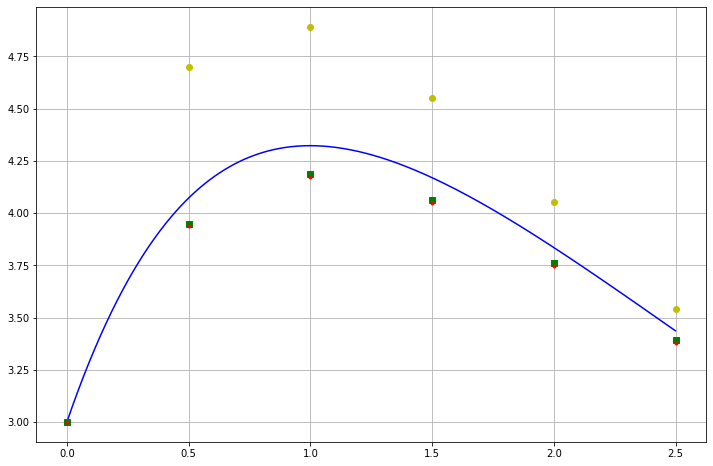

In [ ]:
# Atribui a largura do passo de integração
h = 0.5
# Atribui o valor inicial às variáveis
x0 = 3

# Atribui o domínio
# a é o primeiro valor de x
a = 0
# b é o último valor de x
b = 2.5 
# Cria o vetor x no intervalo de solução [a,b] com passo de h
x = np.arange(a, b+h, h)

# Solução exata (analítica) 
# Cria vetores para o traçado da solução exata
xref = np.arange(a, b, 0.001)
yref = 70/9*np.exp(-0.3*xref)-43/9*np.exp(-1.2*xref)
yref1 = 70/9*np.exp(-0.3*x)-43/9*np.exp(-1.2*x)

yeuler = solve_edo(dydx, a, b, x0, h, 'euler', disp=True)
yeulerm = solve_edo(dydx, a, b, x0, h, 'eulerm', disp=True)
ycenter = solve_edo(dydx, a, b, x0, h, 'center', disp=True)

# Plota o gráfico com as soluções dos métodos de Euler, Euler modificado e 
# ponto central
plt.figure(figsize=(12,8))
plt.plot(xref, yref, 'b-')
plt.plot(x, yeuler, 'yo')
plt.plot(x, yeulerm, 'gs')
plt.plot(x, ycenter, 'r.')
plt.grid()
plt.show()

In [ ]:
print("Vetor x no intervalo de solução [a,b] com passo de h")
print(x)
print("Solução exata (analítica)")
print(yref1)
print("Solução numérica utilizando método de Euler")
print(yeuler)
print("Erro da solução numérica utilizando o método de Euler")
print(yeuler-yref1)
print("Solução numérica utilizando o método de Euler modificado")
print(yeulerm)
print("Erro da solução numérica utilizando o método de Euler modificado")
print(yref1-yeulerm)
print("Solução numérica utilizando o método do ponto central")
print(ycenter)
print("Erro da solução numérica utilizando o método do ponto central")
print(yref1-ycenter)

Vetor x no intervalo de solução [a,b] com passo de h
[0.  0.5 1.  1.5 2.  2.5]
Solução exata (analítica)
[3.         4.07229533 4.32288048 4.16956871 3.83510473 3.43609053]
Solução numérica utilizando método de Euler
[3.         4.7        4.89247792 4.54985494 4.05164051 3.54149693]
Erro da solução numérica utilizando o método de Euler
[0.         0.62770467 0.56959744 0.38028623 0.21653578 0.1054064 ]
Solução numérica utilizando o método de Euler modificado
[3.         3.94623896 4.18774607 4.06331474 3.76348262 3.39362953]
Erro da solução numérica utilizando o método de Euler modificado
[0.         0.12605637 0.13513442 0.10625398 0.07162211 0.042461  ]
Solução numérica utilizando o método do ponto central
[3.         3.9371022  4.17458267 4.04891129 3.74930277 3.38039086]
Erro da solução numérica utilizando o método do ponto central
[0.         0.13519313 0.14829781 0.12065742 0.08580196 0.05569967]


**Fonte do código:**
*   Código do método do ponto central baseado na explicação do tópico 8.4 Método do Ponto Central na página 346 do livro Métodos Numéricos para Engenheiros e Cientistas - Gilat 
*   Exemplo de aplicação é baseado no Exemplo 8-1: Solução de uma EDO de primeira ordem usando o método explícito de Euler e no Exemplo 8-3: Solução de uma EDO de primeira ordem usando o método de Euler modificado, ambos do livro Métodos Numéricos para Engenheiros e Cientistas - Gilat